[*********************100%***********************]  1 of 1 completed


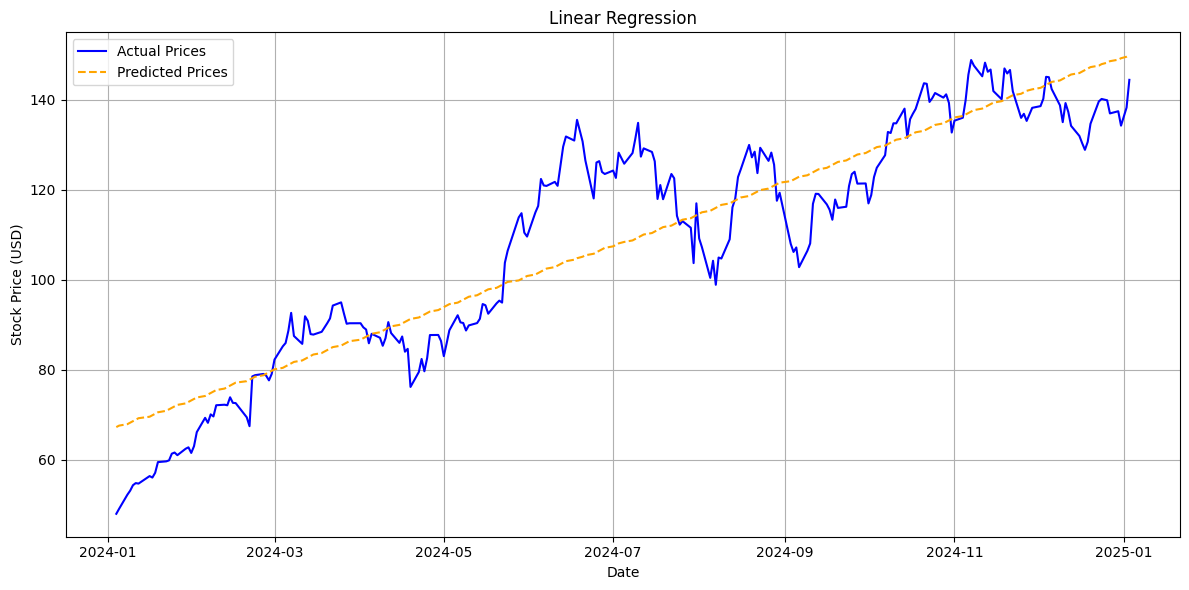

In [17]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Step 1: Fetch NVIDIA Stock Data
ticker = "NVDA"
data = yf.download(ticker, period="1y")

# Use the 'Close' price for predictions
data = data[['Close']]
data['Date'] = data.index

# Step 2: Add a Time Feature
data['Days'] = np.arange(len(data))

# Step 3: Prepare the Data for Training
X = data['Days'].values.reshape(-1, 1)  # Days (independent variable)
y = data['Close'].values  # Close prices (dependent variable)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict and Evaluate
predictions = model.predict(X_test)

# Plotting the Results
plt.figure(figsize=(12, 6))

# Plot actual prices
plt.plot(data['Date'], data['Close'], label="Actual Prices", color='blue')

# Plot the model's prediction for existing data
plt.plot(data['Date'], model.predict(X), label="Predicted Prices", linestyle='dashed', color='orange')

# Final plot adjustments
plt.title("Linear Regression")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid()
plt.tight_layout()

# Save or show the plot
plt.show()


In [19]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Model Evaluation Metrics:
Mean Absolute Error (MAE): 8.45
Mean Squared Error (MSE): 110.11
Root Mean Squared Error (RMSE): 10.49
R² Score: 0.85
